In [3]:
# Load testing and training data. 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load data from disk and split into training and validation sets.
data = np.loadtxt('data/credit-data.csv', dtype=np.int, delimiter=',', skiprows=1)
X, y = data[:, 1:-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [33]:
model = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.5, max_depth=1, random_state=0)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat = np.rint(np.squeeze(y_hat)).astype(int)
assert len(y_hat) == len(X_test)

# Print out accuracy/precision/recall scores.
print("Accuracy:  {:06.3f}%".format(100 * accuracy_score(y_test, y_hat)))
print("Precision: {:06.3f}%".format(100 * precision_score(y_test, y_hat)))
print("Recall:    {:06.3f}%".format(100 * recall_score(y_test, y_hat)))

Accuracy:  82.000%
Precision: 66.829%
Recall:    33.805%


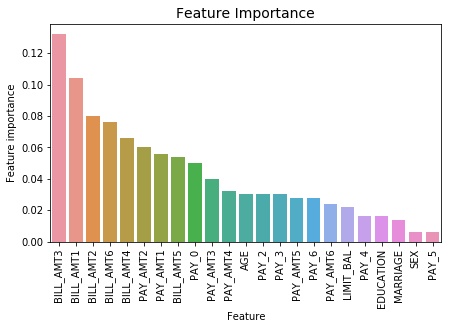

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


learn = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.5, max_depth=1, random_state=0)

learn.fit(X,y)

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': learn.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

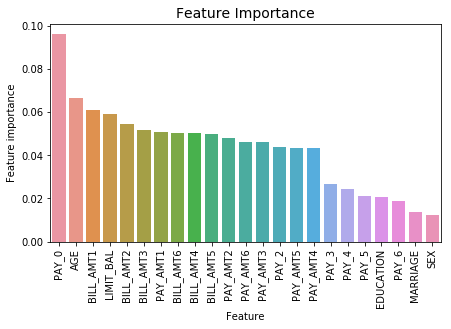

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

learn2 = RandomForestClassifier(n_estimators = 500, random_state=0)

learn2.fit(X,y)

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': learn2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

learn = RandomForestClassifier()

class CreditModelRFC:
    def __init__(self):
        """
        Instantiates the model object, creating class variables if needed.
        """
        learn = RandomForestClassifier(n_estimators = 500, random_state=0)

    def fit(self, X_train, y_train):
        """
        Fits the model based on the given `X_train` and `y_train`.

        You should somehow manipulate and store this data to your model class
        so that you can make predictions on new testing data later on.
        """

        # TODO: Fit your model based on the given X and y.

        learn.fit(X_train, y_train)

    def predict(self, X_test):
        """
        Returns `y_hat`, a prediction for a given `X_test` after fitting.

        You should make use of the data that you stored/computed in the
        fitting phase to make your prediction on this new testing data.
        """

        # TODO: Predict on `X_test` based on what you learned in the fit phase.
        return learn.predict(X_test)
   


In [23]:
model = CreditModelRFC()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat = np.rint(np.squeeze(y_hat)).astype(int)
assert len(y_hat) == len(X_test)

# Print out accuracy/precision/recall scores.
print("Accuracy:  {:06.3f}%".format(100 * accuracy_score(y_test, y_hat)))
print("Precision: {:06.3f}%".format(100 * precision_score(y_test, y_hat)))
print("Recall:    {:06.3f}%".format(100 * recall_score(y_test, y_hat)))

Accuracy:  81.773%
Precision: 65.366%
Recall:    33.989%


Accuracy:  81.653%
Precision: 65.437%
Recall:    32.698%


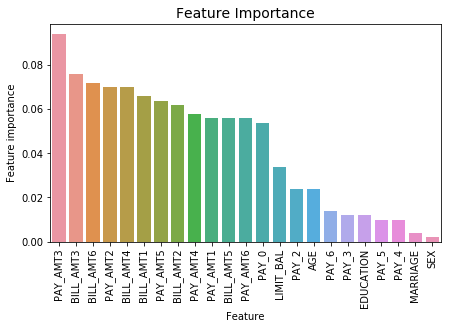

In [38]:
from sklearn.ensemble import AdaBoostClassifier

modelABC = AdaBoostClassifier(random_state=0, algorithm='SAMME.R',learning_rate=0.8,
                      n_estimators=500)

modelABC.fit(X_train, y_train)
y_hat = modelABC.predict(X_test)
y_hat = np.rint(np.squeeze(y_hat)).astype(int)
assert len(y_hat) == len(X_test)

# Print out accuracy/precision/recall scores.
print("Accuracy:  {:06.3f}%".format(100 * accuracy_score(y_test, y_hat)))
print("Precision: {:06.3f}%".format(100 * precision_score(y_test, y_hat)))
print("Recall:    {:06.3f}%".format(100 * recall_score(y_test, y_hat)))


tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': modelABC.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [ ]:
from catboost import CatBoostClassifier

modelCBC = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 0,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

modelCBC.fit(X_train, y_train)
y_hat = modelCBC.predict(X_test)
y_hat = np.rint(np.squeeze(y_hat)).astype(int)
assert len(y_hat) == len(X_test)

# Print out accuracy/precision/recall scores.
print("Accuracy:  {:06.3f}%".format(100 * accuracy_score(y_test, y_hat)))
print("Precision: {:06.3f}%".format(100 * precision_score(y_test, y_hat)))
print("Recall:    {:06.3f}%".format(100 * recall_score(y_test, y_hat)))


tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': modelCBC.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

0:	total: 1.18s	remaining: 9m 50s
50:	total: 51.4s	remaining: 7m 32s
100:	total: 1m 32s	remaining: 6m 6s
150:	total: 2m 14s	remaining: 5m 10s
200:	total: 2m 55s	remaining: 4m 21s
250:	total: 3m 37s	remaining: 3m 36s
300:	total: 4m 22s	remaining: 2m 53s
350:	total: 5m 5s	remaining: 2m 9s
400:	total: 5m 41s	remaining: 1m 24s
450:	total: 6m 21s	remaining: 41.4s
